- name: Alanoud Alamri 
- ID: 443200043
- serial No.: 2

In [4]:
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install matplotlib
%matplotlib inline
%pip install geopy
%pip install folium

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


In [6]:
#Read the dataset
df = pd.read_csv("Osteoporosis.csv")
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidm,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


Here is the table summarizing the key columns in the osteoporosis dataset:

| **Column Name**         | **Description**                                           | **Example Values**            |
|--------------------------|-----------------------------------------------------------|--------------------------------|
| **Id**                  | Unique identifier for each record.                        | 104866, 101999                |
| **Age**                 | Age of the individual.                                    | 32, 69, 89                    |
| **Gender**              | Gender of the individual.                                 | Male, Female                  |
| **Hormonal Changes**    | Status of hormonal changes.                               | Normal, Postmenopausal        |
| **Family History**      | Indicates family history of osteoporosis.                 | Yes, No                       |
| **Race/Ethnicity**      | Race or ethnicity of the individual.                      | Asian, Caucasian, African American |
| **Body Weight**         | Categorized body weight.                                  | Underweight, Normal           |
| **Calcium Intake**      | Level of calcium intake.                                  | Low, Adequate                 |
| **Vitamin D Intake**    | Level of vitamin D intake.                                | Sufficient, Insufficient      |
| **Physical Activity**   | Level of physical activity.                               | Active, Sedentary             |
| **Smoking**             | Smoking status.                                           | Yes, No                       |
| **Alcohol Consumption** | Level of alcohol consumption (contains missing values).   | Moderate, NaN                 |
| **Medical Conditions**  | Medical conditions affecting the individual (missing data). | Rheumatoid Arthritis, NaN    |
| **Medications**         | Medications used by the individual (missing data).        | Corticosteroids, NaN          |
| **Prior Fractures**     | Indicates whether the individual has had prior fractures. | Yes, No                       |
| **Osteoporosis**        | Target variable indicating presence of osteoporosis.      | 1 (Yes), 0 (No)               |


In [7]:
# to get number of (rows,columns) in the dataset
df.shape

(1958, 16)

so we have 1958 row and 16 column

In [8]:
#The percentage of missing values per variable 

nullVal = (df.isnull().sum()/df.count()*100) # to get the percentage 

#i use the sum of null values devided by the total count in the dataset multiblied by 100 

print('percentage of null values :\n') 

nullVal.reset_index() # i use the reset_index() just to be easy to read

percentage of null values :



,index,0
0,Id,0.000000
1,Age,0.000000
2,Gender,0.000000
3,Hormonal Changes,0.000000
4,Family History,0.000000
5,Race/Ethnicity,0.000000
6,Body Weight,0.000000
7,Calcium Intake,0.000000
8,Vitamin D Intake,0.000000
9,Physical Activity,0.000000


okay as we note here there is missing value in the following columns (Alcohol Consumption , Medical Conditions ,Medications)

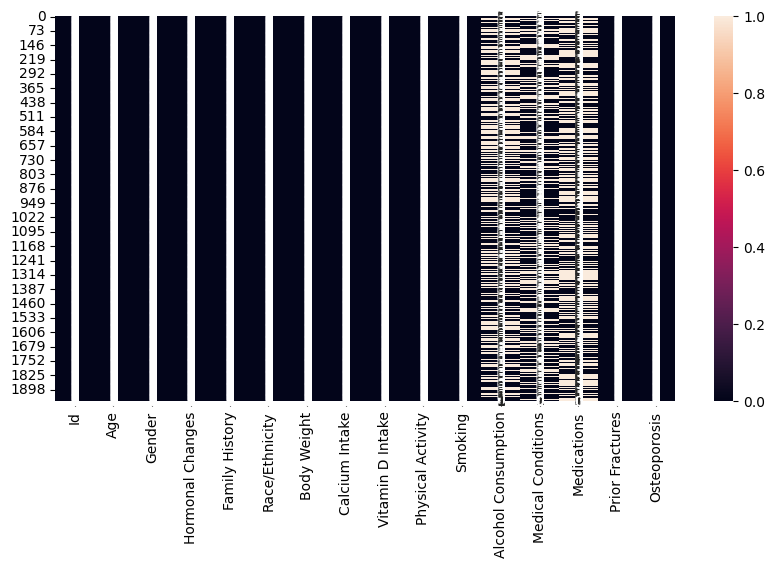

In [11]:
#Visulaization of missing values

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), annot=True)
plt.show() # to display the graph

as we note here there is missing value in the following columns (Alcohol Consumption , Medical Conditions ,Medications)

**EDA**

First i shoud replace the missing value with null 

In [12]:
# Replace missing values in 'Alcohol Consumption' with 'null'
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna("null")

# Replace missing values in 'Medical Conditions' with 'null'
df['Medical Conditions'] = df['Medical Conditions'].fillna("null")

df['Medications'] = df['Medications'].fillna("null")

# Verify the absence of missing values
print("Missing values in 'Alcohol Consumption':", df['Alcohol Consumption'].isnull().sum())  # Should return 0
print("Missing values in 'Medical Conditions':", df['Medical Conditions'].isnull().sum())  # Should return 0
print("Missing values in 'Medications':", df['Medications'].isnull().sum())  # Should return 0

Missing values in 'Alcohol Consumption': 0
Missing values in 'Medical Conditions': 0
Missing values in 'Medications': 0


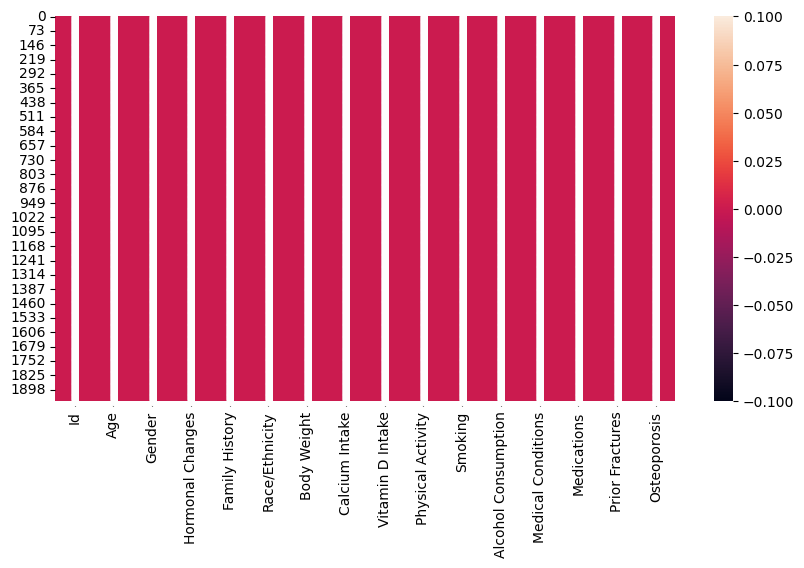

In [13]:

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), annot=True)
plt.show() # to display the graph

as showing we full all the null value 

In [14]:
# Drop the 'Id' column 
df.drop('Id', axis=1, inplace=True)
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,null,null,null,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidm,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,null,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,null,Rheumatoid Arthritis,null,Yes,1


The "Id" column is just a unique identifier for each row and doesn't contain any meaningful information for analysis or statistical modeling. Keeping it could be unnecessary i am trying focus on actual predictive or descriptive features.

In [15]:
# define features
features_num = ['Age']

features_cat = ['Gender', 'Hormonal Changes', 'Family History', 
                'Race/Ethnicity', 'Body Weight', 'Calcium Intake',
                'Vitamin D Intake', 'Physical Activity', 'Smoking',
                'Alcohol Consumption', 'Medical Conditions', 'Medications',
                'Prior Fractures']

target = 'Osteoporosis'

it will be much easier to deal with the attrubie based on if its numberic "continuous" and category 

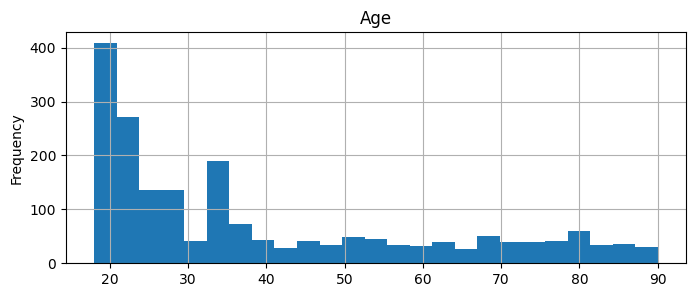

In [16]:
# plot histograms
for f in features_num:
    plt.figure(figsize=(8,3))
    df[f].plot(kind='hist', bins=25)
    plt.title(f)
    plt.grid()
    plt.show()

 The bulk of the data is skewed towards a younger population, particularly those in their early to mid-20s, which is the most common age range in this dataset. 
 so that my make the Age as Confounding Variable based on its may effect on the outcome.

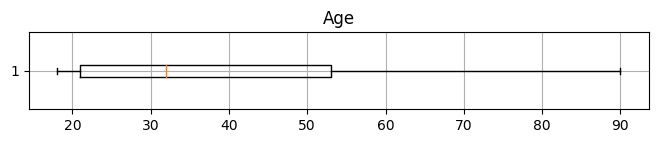

In [18]:
import matplotlib.pyplot as plt

features_num = ['Age'] 

# Loop through each feature in the list to create a boxplot
for f in features_num:
    plt.figure(figsize=(8, 1))
    plt.boxplot(df[f], vert=False)
    plt.title(f)
    plt.grid(True)  # Ensure grid is turned on
    plt.show()  # Display the plot


Here we show that there is no outliner in the Age 

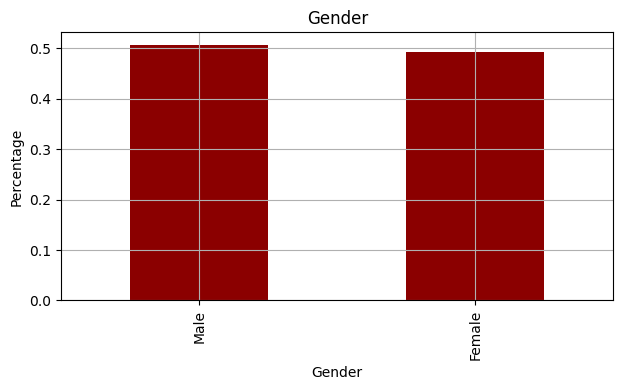

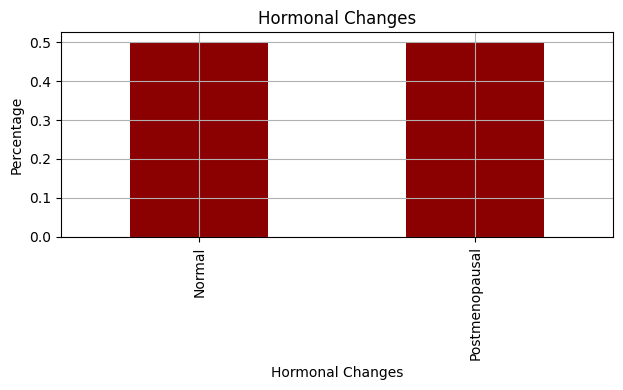

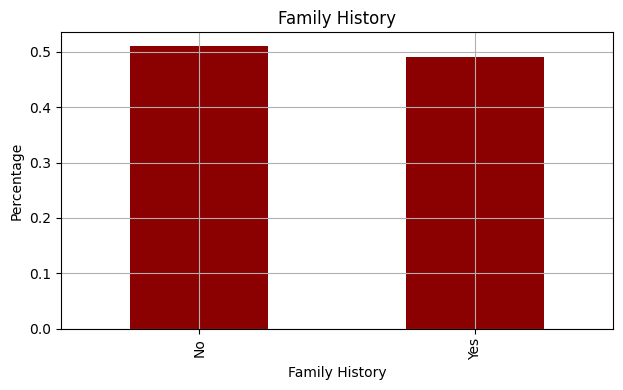

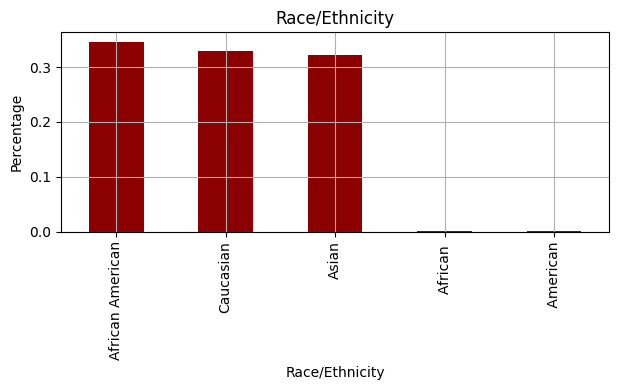

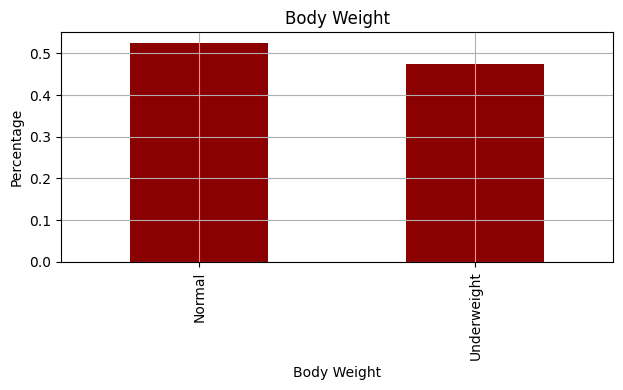

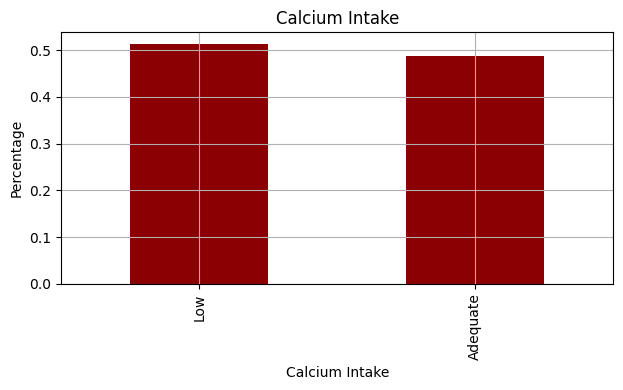

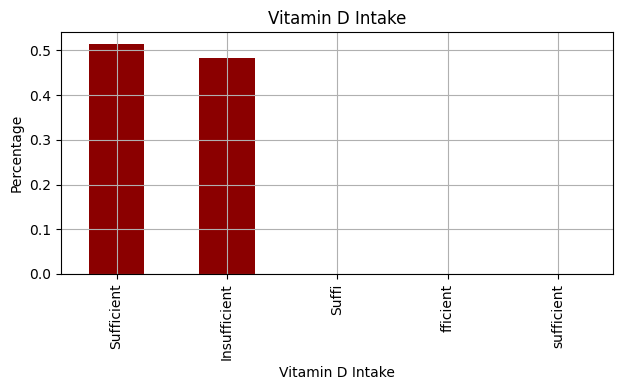

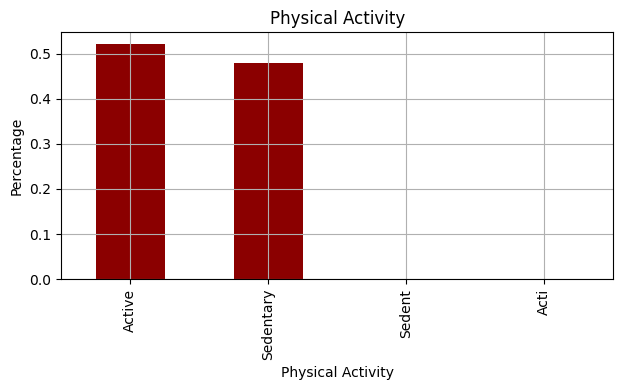

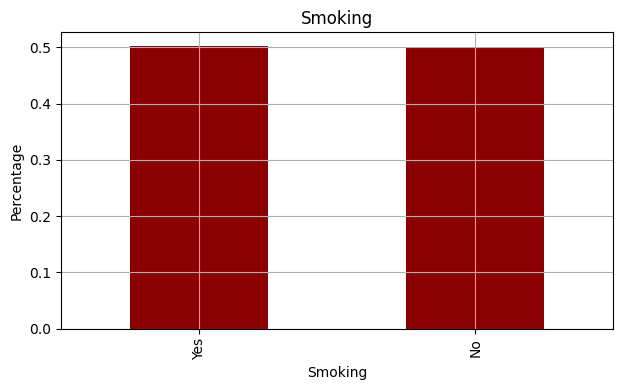

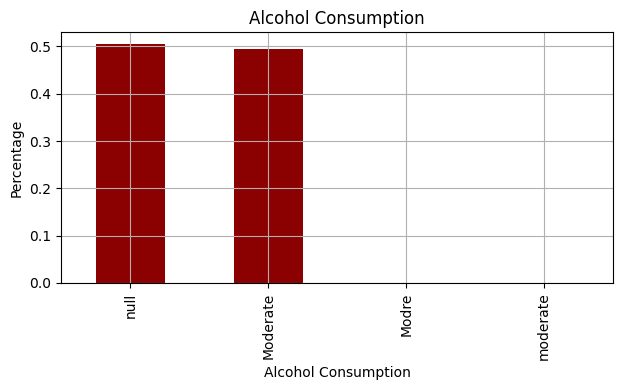

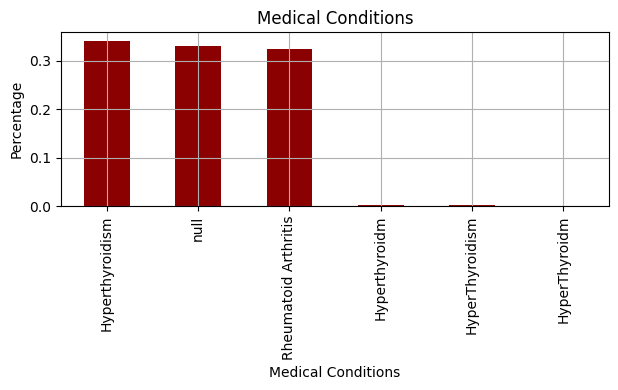

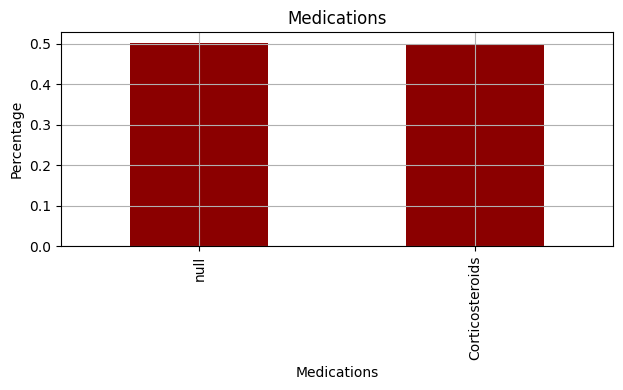

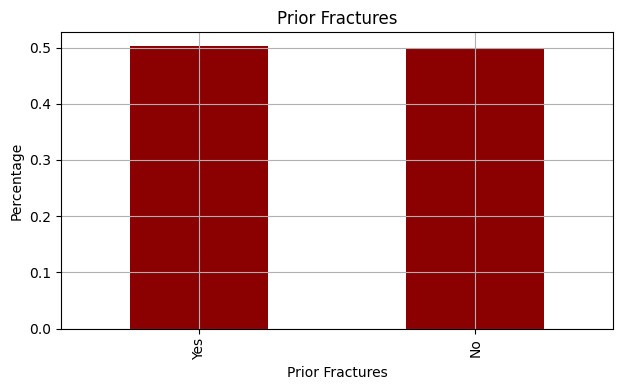

In [19]:
# Plotting for each categorical feature
for f in features_cat:
    plt.figure(figsize=(12, 4))

    # Training data
    plt.subplot(1, 2, 1)
    df[f].value_counts(normalize=True).plot(kind='bar', color='darkred')
    plt.title(f)
    plt.ylabel('Percentage')
    plt.grid(True)
    
    # Show plot
    plt.tight_layout()
    plt.show()


Okay now after we deal with numberic "continuous" and category columns let have an idea about how many person may have osteoporosis? 

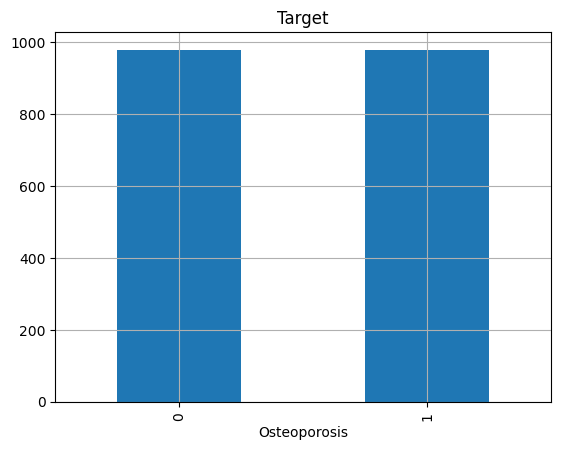

In [20]:
# plot target
df[target].value_counts().sort_index().plot(kind='bar')
plt.title("Target")
plt.grid()
plt.show()

So the target is clearly balance 

In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode non-numeric columns
encoded_df = df.copy()

# Apply Label Encoding to all non-numeric columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    encoded_df[column] = label_encoders[column].fit_transform(df[column])


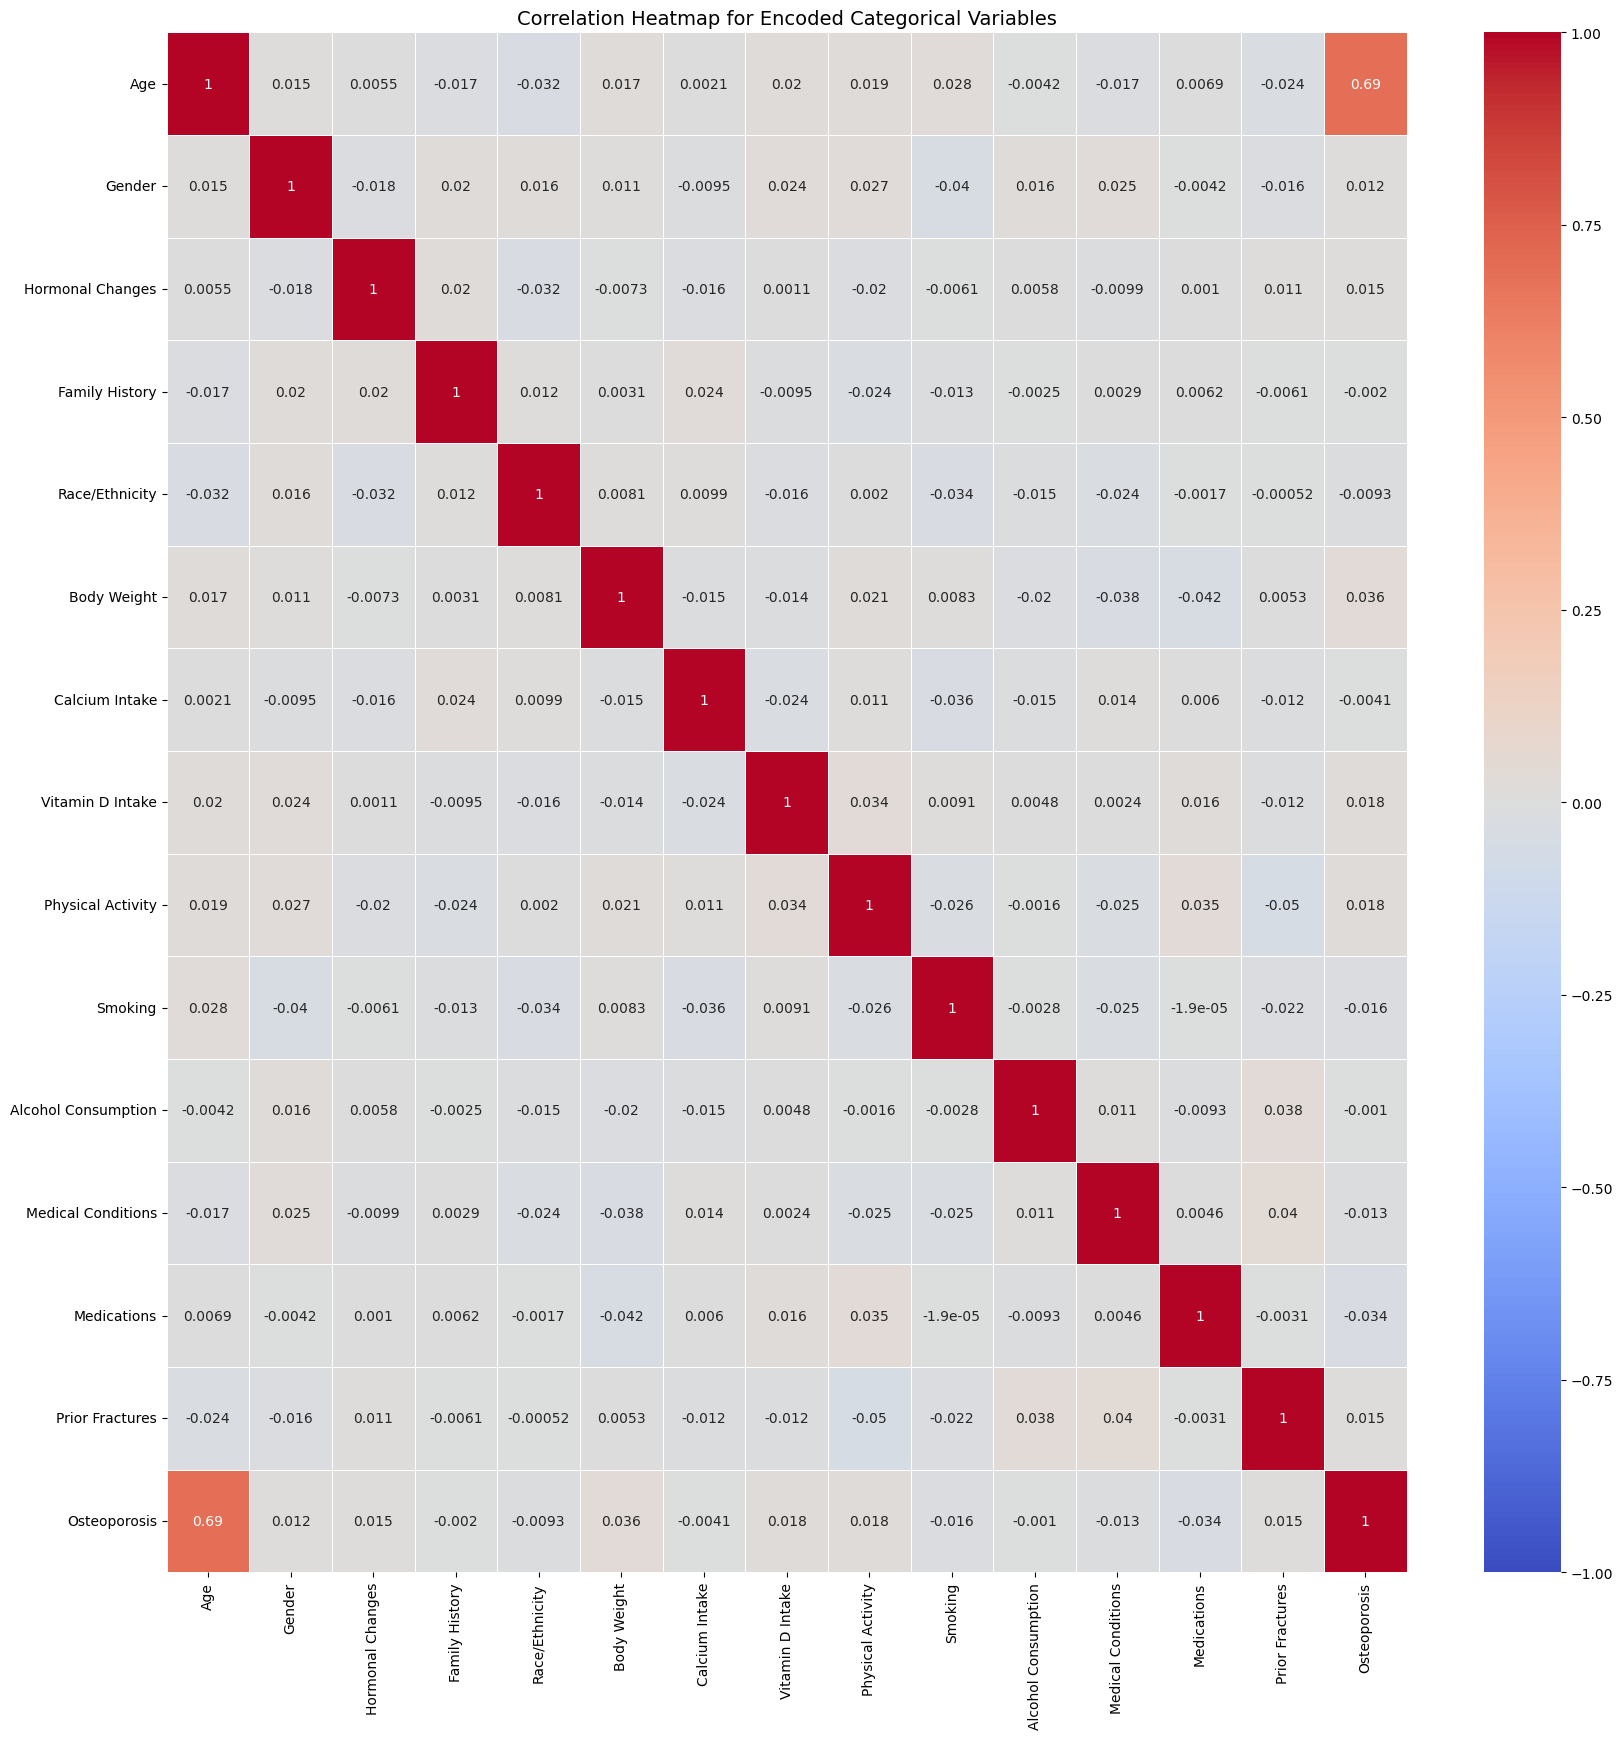

In [22]:
# Compute correlation matrix for the encoded dataframe
correlation_matrix = encoded_df.corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Encoded Categorical Variables", fontsize=14)
plt.show()

 Looking at the Correlation Heatmap we can see that the categorical features do not have much impact on the target. The main driver is "Age".

 From the correlation Heatmap we noted the following 

**Strong Correlations**

-Age and Osteoporosis -> 0.69

**Weak Correlations**

-Smoking and Osteoporosis -> -0.016

-Calcium Intake and Body Weight -> -0.015

-Family History and Osteoporosis -> 0.012

-Race/Ethnicity and Osteoporosis -> -0.009


So let's focus a little on the age column, and compere the Age with the target 

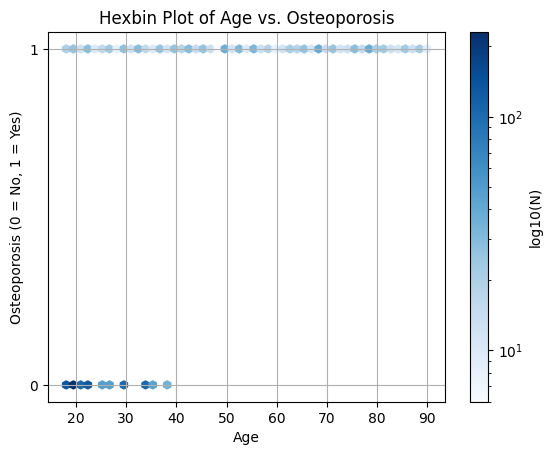

In [23]:
hb = plt.hexbin(df['Age'], df['Osteoporosis'], gridsize=50, cmap='Blues', bins='log')
plt.colorbar(hb, label='log10(N)')
plt.title('Hexbin Plot of Age vs. Osteoporosis')
plt.xlabel('Age')
plt.ylabel('Osteoporosis (0 = No, 1 = Yes)')
plt.grid(True)

# Set y-axis to only include the labels for 0 and 1
plt.yticks([0, 1])

plt.show()

Here i used the logarithmic scale to enhance the visibility of bins across varied data magnitudes, highlighting areas with lower counts alongside those with higher densities. Logistic regression, ideal for binary outcomes like osteoporosis (0 or 1) , so as we see a higher frequency of data points among younger ages, suggesting a larger representation of this demographic in the dataset. There's a visible consistency across a wide age range (20 to 90 years), indicating comprehensive data coverage, although the extremities of this range show sparser data, likely reflecting fewer individuals in these age brackets.

                    Age
Osteoporosis           
1             53.859040
0             24.343207


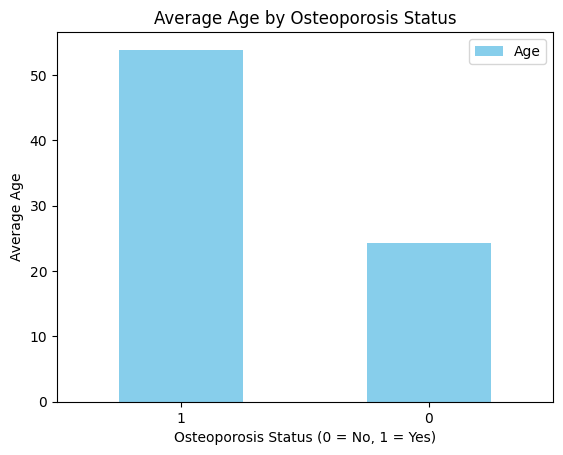

In [24]:
# Calculate the mean age for each category of the 'Osteoporosis' variable
mean_ages = df[['Osteoporosis', 'Age']].groupby(['Osteoporosis'], as_index=True).mean().sort_values(by='Osteoporosis', ascending=False)

# Print the result
print(mean_ages)

# Optionally, plot the results
mean_ages.plot(kind='bar', color='skyblue')
plt.xlabel('Osteoporosis Status (0 = No, 1 = Yes)')
plt.ylabel('Average Age')
plt.title('Average Age by Osteoporosis Status')
plt.xticks(rotation=0)  # Ensure the x-axis labels are horizontal for clarity
plt.show()

The average age of individuals grouped by their osteoporosis status, showing a significant difference in age between the two groups. Individuals with osteoporosis (1) have an average age of approximately 54 years, whereas those without the condition (0) average about 24 years. This stark age discrepancy highlights age as a potentially major factor in the incidence of osteoporosis within this dataset.

In [25]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("Osteoporosis.csv")

# Select your independent variable (age) and your dependent variable (osteoporosis)
X = df[['Age']]  # Independent variable
y = df['Osteoporosis']  # Dependent variable

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.355281
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Osteoporosis   No. Observations:                 1958
Model:                          Logit   Df Residuals:                     1956
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.4874
Time:                        23:24:05   Log-Likelihood:                -695.64
converged:                       True   LL-Null:                       -1357.2
Covariance Type:            nonrobust   LLR p-value:                1.089e-289
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2506      0.239    -22.001      0.000      -5.718      -4.783
Age            0.1562      0.

Coefficient for Age: The coefficient for age is 0.1562, which suggests that as age increases by one year, the log odds of having osteoporosis increases by 0.1562. This is statistically significant, as indicated by the p-value of 0.000.

Constant (Intercept): The constant term is -5.2506, representing the log odds of osteoporosis when age is zero (theoretical baseline).

Model Fit: The pseudo R-squared value is 0.4874, suggesting that approximately 48.74% of the variability in osteoporosis status is explained by age alone in this model.

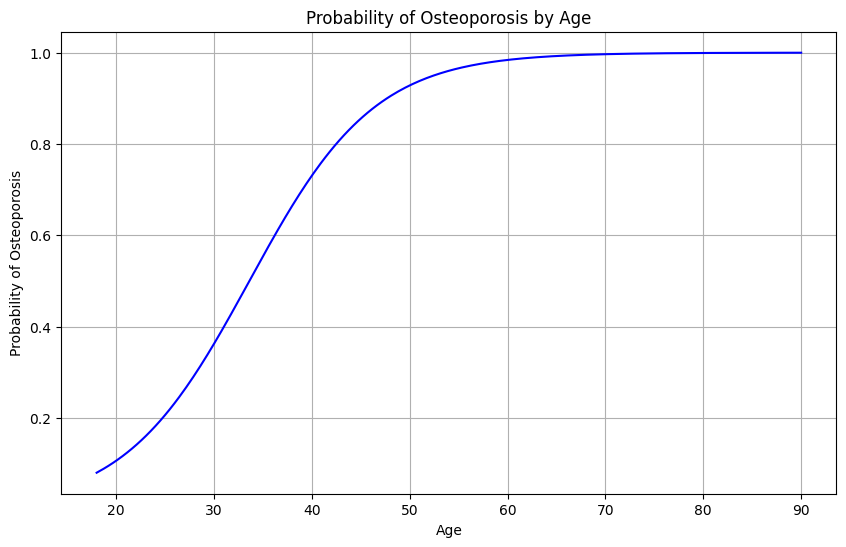

In [26]:
# Generate a range of ages from minimum to maximum in the dataset
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 300)

# Calculate the probability of osteoporosis at each age
logit_probabilities = result.predict(sm.add_constant(age_range))

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_range, y=logit_probabilities, color='blue')
plt.title('Probability of Osteoporosis by Age')
plt.xlabel('Age')
plt.ylabel('Probability of Osteoporosis')
plt.grid(True)
plt.show()


The graph illustrates a logistic curve where the probability of osteoporosis significantly increases with age, particularly after age 50, leveling off as it approaches older age groups.

**Train Test Split**

In [28]:
x = df.drop("Osteoporosis",axis=1)
y = df["Osteoporosis"]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Train and Evaluate The Models**

LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
# Define categorical and numerical features
categorical_features = ['Gender', 'Hormonal Changes', 'Family History', 
                'Race/Ethnicity', 'Body Weight', 'Calcium Intake',
                'Vitamin D Intake', 'Physical Activity', 'Smoking',
                'Alcohol Consumption', 'Medical Conditions', 'Medications',
                'Prior Fractures']  # replace with actual categorical columns
numeric_features = ['Age']  # replace with actual numeric columns


# Create a preprocessing pipeline that applies OneHotEncoder to the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline that includes preprocessing and the logistic regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Splitting the data into features and target variable, assuming 'target' is your dependent variable
X = df.drop('Osteoporosis', axis=1)
y = df['Osteoporosis']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model using the pipeline
pipeline.fit(x_train, y_train)

# Predict using the test set
regpred = pipeline.predict(x_test)

# Print the classification report and accuracy
print(classification_report(y_test, regpred))
print("Accuracy of Logistic Regression is: ", accuracy_score(y_test, regpred) * 100)


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       193
           1       0.83      0.78      0.81       199

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392

Accuracy of Logistic Regression is:  80.86734693877551


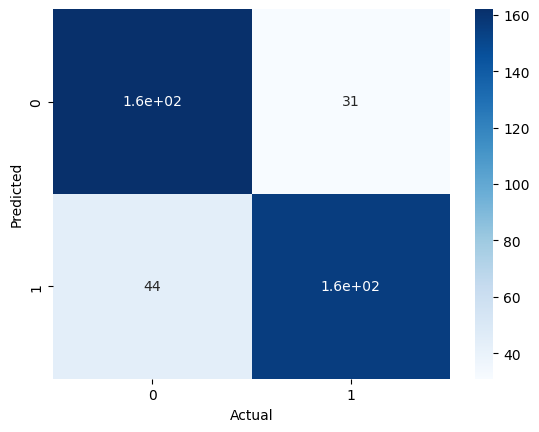

In [32]:
sns.heatmap(confusion_matrix(y_test,regpred),annot=True,cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()